In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [4]:

import yfinance as yf


df = yf.download("NVDA", start="2009-01-01", end="2024-11-20")
df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2024-11-13 00:00:00+00:00,146.270004,146.270004,149.330002,145.899994,149.070007,191903300
2024-11-14 00:00:00+00:00,146.759995,146.759995,149.000000,145.550003,147.639999,194463300
2024-11-15 00:00:00+00:00,141.979996,141.979996,145.240005,140.080002,144.869995,250132900
2024-11-18 00:00:00+00:00,140.149994,140.149994,141.550003,137.149994,139.500000,221866000
2024-11-19 00:00:00+00:00,147.009995,147.009995,147.130005,140.990005,141.320007,227834900


In [5]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2024-11-13 00:00:00+00:00,146.270004,146.270004,149.330002,145.899994,149.070007,191903300
2024-11-14 00:00:00+00:00,146.759995,146.759995,149.000000,145.550003,147.639999,194463300
2024-11-15 00:00:00+00:00,141.979996,141.979996,145.240005,140.080002,144.869995,250132900
2024-11-18 00:00:00+00:00,140.149994,140.149994,141.550003,137.149994,139.500000,221866000
2024-11-19 00:00:00+00:00,147.009995,147.009995,147.130005,140.990005,141.320007,227834900


In [6]:
df = df.reset_index()
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

<ipython-input-6-56f354545312>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
0,0.21775,0.21925,0.20100,0.20175,497124000
1,0.22175,0.22675,0.21375,0.21525,705736000
2,0.22925,0.23575,0.22325,0.22825,657904000
3,0.21550,0.22400,0.20775,0.22400,870096000
4,0.21000,0.21275,0.19700,0.21275,1014496000


In [7]:
df.columns = df.columns.droplevel(1)

In [8]:
df.tail()

Price,Close,High,Low,Open,Volume
3993,146.270004,149.330002,145.899994,149.070007,191903300
3994,146.759995,149.000000,145.550003,147.639999,194463300
3995,141.979996,145.240005,140.080002,144.869995,250132900
3996,140.149994,141.550003,137.149994,139.500000,221866000
3997,147.009995,147.130005,140.990005,141.320007,227834900


In [9]:
df.shape

(3998, 5)

In [10]:
# Moving Average for 100
ma100 = df.Close.rolling(100).mean()

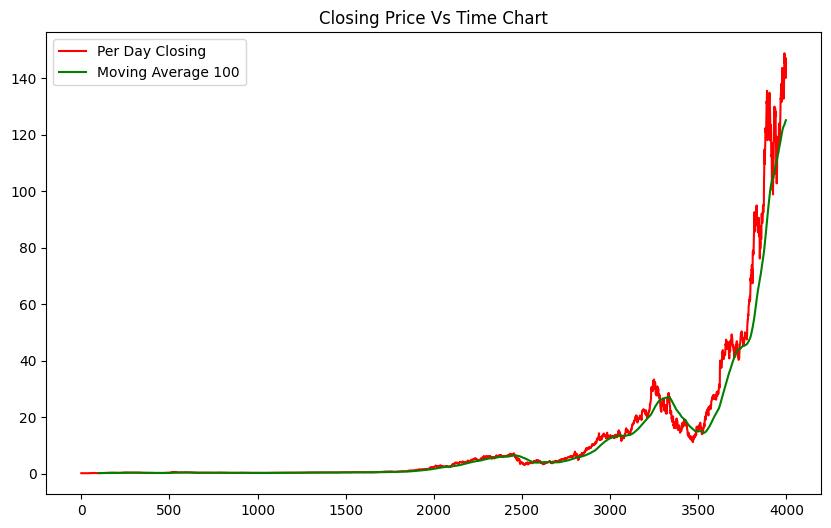

In [11]:
plt.figure(figsize = (10, 6))
plt.title("Closing Price Vs Time Chart")
plt.plot(df.Close, 'r', label="Per Day Closing")
plt.plot(ma100, 'g', label="Moving Average 100")
plt.legend()

In [12]:
# Moving Average for 200
ma200 = df.Close.rolling(200).mean()

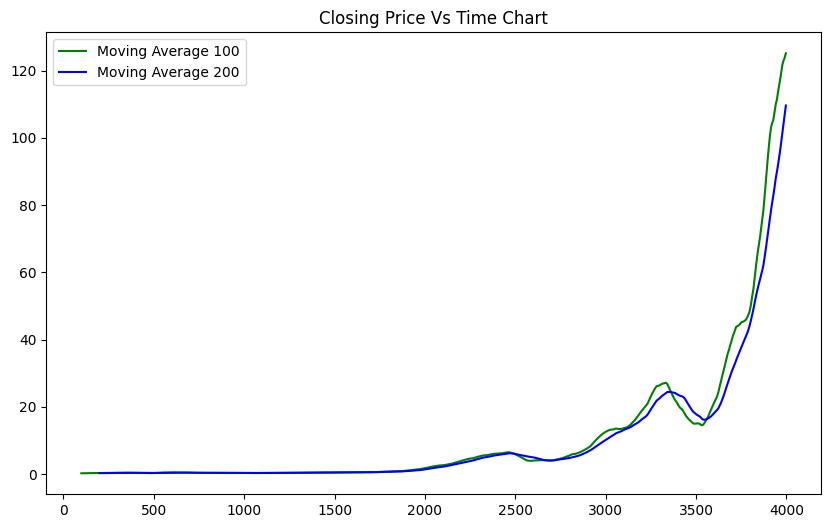

In [13]:
plt.figure(figsize = (10, 6))
plt.title("Closing Price Vs Time Chart")
plt.plot(ma100, 'g', label="Moving Average 100")
plt.plot(ma200, 'b', label="Moving Average 200")
plt.legend()

In [14]:
train_df = pd.DataFrame(df['Close'][0: int(len(df)*0.80)])
test_df = pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])
print(train_df.shape)
print(test_df.shape)

(3198, 1)
(800, 1)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [16]:
train_df_arr = scaler.fit_transform(train_df)
train_df_arr

array([[0.0016547 ],
       [0.0018312 ],
       [0.00216214],
       ...,
       [0.96950944],
       [0.97348072],
       [0.97784908]])

In [17]:
x_train = []
y_train = []
for i in range(100, train_df_arr.shape[0]):
    x_train.append(train_df_arr[i-100: i])
    y_train.append(train_df_arr[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((3098, 100, 1), (3098,))

In [18]:
from keras.api.layers import Dense, Dropout, LSTM
from keras.api.models import Sequential

In [19]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
gpus = tf.config.list_physical_devices('GPU')

In [22]:
if gpus:
    try:
        # Optional: Set memory growth to avoid TensorFlow allocating all GPU memory
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPUs detected: {[gpu.name for gpu in gpus]}")
    except RuntimeError as e:
        print(f"Error setting GPU memory growth: {e}")
else:
    print("No GPUs detected. Running on CPU.")

Error setting GPU memory growth: Physical devices cannot be modified after being initialized


In [23]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - loss: 0.0206
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0025
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0023
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0022
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0017
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0021
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0016
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0022
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0016
Epoch 10/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0019
Epoch 11/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0015
Epoch 12/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0015
Epoch 13/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0014
Epoch 14/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0021
Epoch 15/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0017
Ep

In [24]:
model.save('keras_model.h5')

In [25]:
past_100_days = train_df.tail(100)

In [26]:
final_df = past_100_days._append(test_df, ignore_index=True)
final_df.head()

,Close
0,15.47800
1,15.38175
2,15.27675
3,15.32475
4,15.00950


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.030882  ],
       [0.03018278],
       [0.02941999],
       [0.02976869],
       [0.02747851],
       [0.02622355],
       [0.02269656],
       [0.02347569],
       [0.02394426],
       [0.02604556],
       [0.02207543],
       [0.02236965],
       [0.01839044],
       [0.01771301],
       [0.02191016],
       [0.02134715],
       [0.02025927],
       [0.02062251],
       [0.02459445],
       [0.02734956],
       [0.03185546],
       [0.03211517],
       [0.03249475],
       [0.03095464],
       [0.03645034],
       [0.03659564],
       [0.04032785],
       [0.04171903],
       [0.04613957],
       [0.0464356 ],
       [0.04525873],
       [0.04454134],
       [0.04502625],
       [0.04793394],
       [0.04933963],
       [0.04766696],
       [0.04782496],
       [0.05397811],
       [0.05384372],
       [0.05230725],
       [0.05564535],
       [0.05688397],
       [0.05796095],
       [0.05669328],
       [0.06362375],
       [0.06392705],
       [0.06375088],
       [0.065

In [28]:
input_data.shape

(900, 1)

In [29]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((800, 100, 1), (800,))

In [30]:
y_pred = model.predict(x_test)
y_pred.shape

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


(800, 1)

In [31]:
y_pred

array([[0.10390849],
       [0.10478272],
       [0.10555709],
       [0.10620226],
       [0.10669803],
       [0.10705006],
       [0.10728692],
       [0.10743728],
       [0.1075186 ],
       [0.10752344],
       [0.10743558],
       [0.10724209],
       [0.10693685],
       [0.10651119],
       [0.10597023],
       [0.10532593],
       [0.10461469],
       [0.10387715],
       [0.10313395],
       [0.10241435],
       [0.10175075],
       [0.10116868],
       [0.10068563],
       [0.10032052],
       [0.10008713],
       [0.09998789],
       [0.10003436],
       [0.10023976],
       [0.10061029],
       [0.10114492],
       [0.10182914],
       [0.10265964],
       [0.10364387],
       [0.10477237],
       [0.10603982],
       [0.10757628],
       [0.10949035],
       [0.11178914],
       [0.11454339],
       [0.11793277],
       [0.12192019],
       [0.12680584],
       [0.13222136],
       [0.13784975],
       [0.14340748],
       [0.14860073],
       [0.15330327],
       [0.157

In [32]:
scale = scaler.scale_
scale_factor = 1/scale
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

In [33]:
y_pred

array([[ 14.30331642],
       [ 14.42365562],
       [ 14.53025081],
       [ 14.61906014],
       [ 14.68730425],
       [ 14.73576258],
       [ 14.76836623],
       [ 14.78906376],
       [ 14.80025813],
       [ 14.80092477],
       [ 14.78883095],
       [ 14.76219626],
       [ 14.72017866],
       [ 14.66158541],
       [ 14.58712107],
       [ 14.49843071],
       [ 14.4005264 ],
       [ 14.29900175],
       [ 14.19669764],
       [ 14.09764364],
       [ 14.00629596],
       [ 13.92617342],
       [ 13.85968001],
       [ 13.80942073],
       [ 13.77729398],
       [ 13.76363408],
       [ 13.77003071],
       [ 13.79830431],
       [ 13.84930919],
       [ 13.9229028 ],
       [ 14.01708727],
       [ 14.13140827],
       [ 14.26689037],
       [ 14.42223106],
       [ 14.59670012],
       [ 14.80819829],
       [ 15.07167564],
       [ 15.38811164],
       [ 15.76724224],
       [ 16.23379968],
       [ 16.78268058],
       [ 17.45520515],
       [ 18.20066694],
       [ 18

In [34]:
y_test

array([ 11.01500034,  10.67299938,   9.88600063,  10.01900005,
        10.71399975,  11.25500011,  10.85399914,  10.43299961,
         9.47199917,   9.28999996,   9.48899937,   9.51500034,
         8.50500011,   9.22399998,   9.47300053,   9.84800053,
         9.60399914,   9.46799946,   9.44399929,   9.71199894,
        10.51900005,  10.63499928,  10.99499989,  11.06300068,
        10.8760004 ,  11.4649992 ,  11.4989996 ,  11.93900013,
        13.48999882,  13.22399998,  13.71399975,  14.3399992 ,
        14.59999943,  15.17399883,  15.37099934,  18.57400036,
        18.52500057,  19.57700062,  19.42999935,  18.2319994 ,
        19.16299915,  19.16299915,  18.79799938,  18.97599888,
        18.03399944,  20.447999  ,  21.75800037,  20.72899914,
        20.51900005,  21.44699955,  20.27600002,  22.14899921,
        21.44899845,  20.20799923,  20.89899921,  19.46600056,
        18.81000042,  21.1999979 ,  20.59899998,  19.26299953,
        18.97099972,  16.93399906,  17.10999966,  19.23

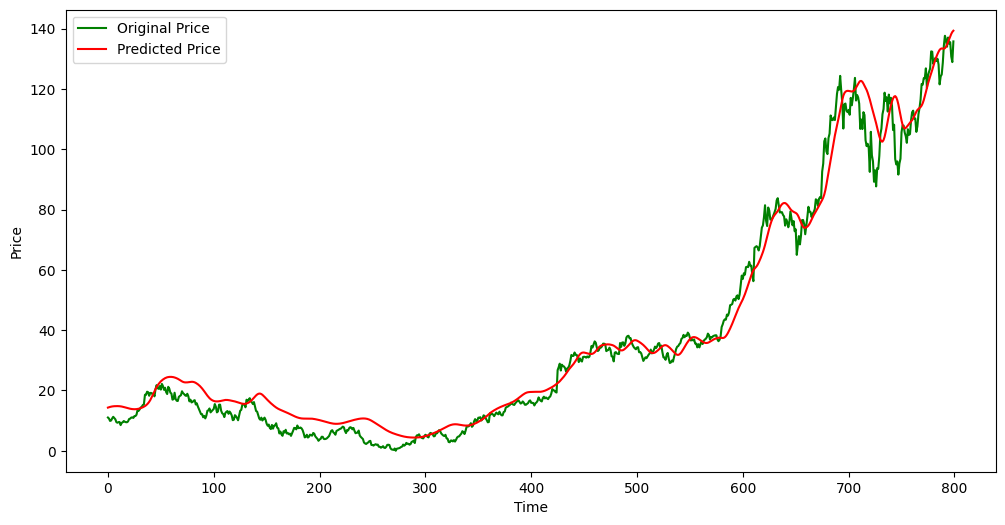

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'g', label="Original Price")
plt.plot(y_pred, 'r', label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()